In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

data = pd.read_csv('bollywood.csv')
data

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


# Data cleaning

In [5]:
data['Genre'] = data['Genre'].replace(['Action ', 'Thriller ', ' Drama '], ['Action', 'Thriller', 'Drama'])

#### 1. how many records are present in the dataset?

In [6]:
data.shape

(149, 10)

There are 149 records in the dataset. labelled 0 to 148

#### 2. How many movies got released in each genre? which genre had the highest number of releases? sort number of releases in each genre in descending order

In [7]:
data['Genre'].value_counts()

Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: count, dtype: int64

There are 36 movies in the comedy genre, 35 movies in the Drama genre, 29 movies in the Thriller genre, 25 movies in the Romance Genre and 24 movies in the Action genre. 

The genre with the highest number of release is the comedy genre with 36 releases.

#### 3. how many movies in each genre got released in different release times like long weekend, festive season(Do a cross tabulation between genre and release times

In [8]:
pd.crosstab(data['Genre'], data['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


The Action Genre has 3 movies released in the Festive season, 3 in the Holiday season, 3 in the Long weekend and 15 in the normal.

The Comedy Genre has 3 movies released in the Festive season, 5 in the Holiday season, 5 in the Long weekend and 23 in the normal.

The Drama Genre has 4 movies released in the Festive season, 6 in the Holiday season, 1 in the Long weekend and 24 in the normal.

The Romance Genre has 3 movies released in the Festive season, 3 in the Holiday season, 4 in the Long weekend and 15 in the normal.

The Thriller Genre has 4 movies released in the Festive season, 1 in the Holiday season, 2 in the Long weekend and 22 in the normal.

#### 4. which month of the year, maximum number movies released are seen? extract a new column called month from release date column

In [9]:
data['Release Date'] =pd.to_datetime(data['Release Date'], format = '%d-%b-%y')

In [10]:
data['Month'] = data['Release Date'].dt.month_name()

data['Month'].value_counts()

Month
January      20
March        19
May          18
July         16
February     16
April        11
September    10
June         10
November     10
October       9
August        8
December      2
Name: count, dtype: int64

January has the most movie released with the count as 20.

#### 5. which month of the year typically sees most releases of high budgeted movies, that is movies with the budget of 25 crore or more

In [11]:
budget = data[data["Budget"] >= 25]
budget['Month'].value_counts()
# budget.head(10)

Month
February     9
January      8
March        7
August       7
November     6
July         6
September    5
June         5
April        4
October      4
May          3
December     2
Name: count, dtype: int64

Report: February sees the most releases with the count of 9.

#### 6. which are the top ten movies with maximum return investment(ROI). calculate return on investment ROI as boxOfficeCollection - budget / budget

In [12]:
data['ROI'] = (data['BoxOfficeCollection'] - data['Budget']) / data['Budget']

data[['MovieName', 'BoxOfficeCollection', 'Budget', 'ROI']].sort_values('ROI', ascending = False)[:10]

,MovieName,BoxOfficeCollection,Budget,ROI
64,Aashiqui 2,110.0,12,8.166667
89,PK,735.0,85,7.647059
132,Grand Masti,298.0,35,7.514286
135,The Lunchbox,85.0,10,7.500000
87,Fukrey,36.2,5,6.240000
58,Mary Kom,104.0,15,5.933333
128,Shahid,40.0,6,5.666667
37,Humpty Sharma Ki Dulhania,130.0,20,5.500000
101,Bhaag Milkha Bhaag,164.0,30,4.466667
115,Chennai Express,395.0,75,4.266667


The top movies with the maximum ROI are: Aashiqui 2 with the ROI of 8.166667,

PK with the ROI of 7.647059,

Grand Masti with 7.514286, 

The Lunchbox with 7.5, 

Fukrey with 6.24, 

Mary Kom with 5.933333, 

Shahid with 5.666667, 

Humpty Sharma Ki Dulhania with 5.5, 

Bhaag Milka Bhaag with 4.466667 and 

Chennai Express with 4.266667.

#### 7. Do the movies have higher ROI if they get released on festive seasons or long weekend? calculate the average ROI from different release times. long weekend

In [13]:
data.groupby('ReleaseTime')['ROI'].mean().reset_index()

,ReleaseTime,ROI
0,FS,0.973853
1,HS,0.850867
2,LW,1.127205
3,N,0.657722


Movies released in Long Weekends have an highest average ROI of 1.127205, 

movies released in Festive season have an average ROI of 0.973853, 

movies released in Holiday season have an average ROI of 0.850867 

The movies released in Normal times have 0.657722.

#### 8. Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies

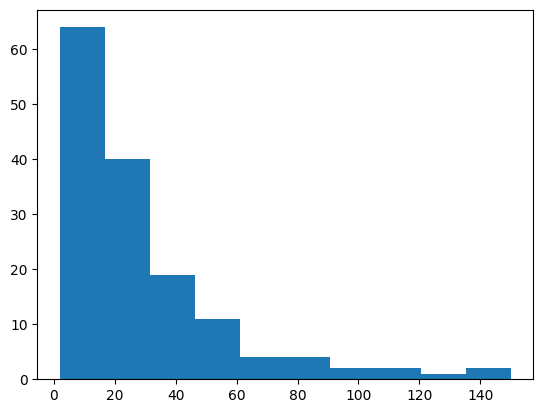

In [14]:
plt.hist(data['Budget']);
#Histogram

The interpretation of the above histogram plot. Most movies are low budgeted movies

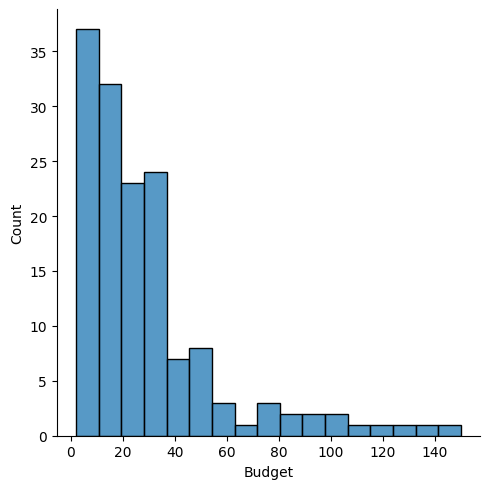

In [15]:
sn.displot(data['Budget']);
#distribution plot

#### 9. Compare the distribution of ROIs between movies with comedy genre and drama. which genre typically sees higher ROIs.

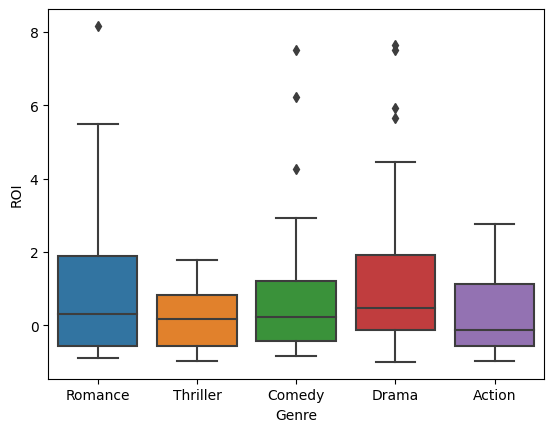

In [16]:
sn.boxplot(x = 'Genre',y = 'ROI', data = data );

comparing the comedy genre and the drama genre, Drama sees higher ROI compared to the Comedy genre

#### 10 Is there a correlation between box office collection and youtube likes? is the correlation positive or negative

In [17]:
data[['BoxOfficeCollection', 'YoutubeLikes']].corr()

,BoxOfficeCollection,YoutubeLikes
BoxOfficeCollection,1.000000,0.682517
YoutubeLikes,0.682517,1.000000


There is a positive correlation between BoxOfficeColletion and YoutubeLike. the value is 0.682517

#### 11. Which genre of movies typically sees more YouTube likes Draw boxplots for each genre of movies to compare

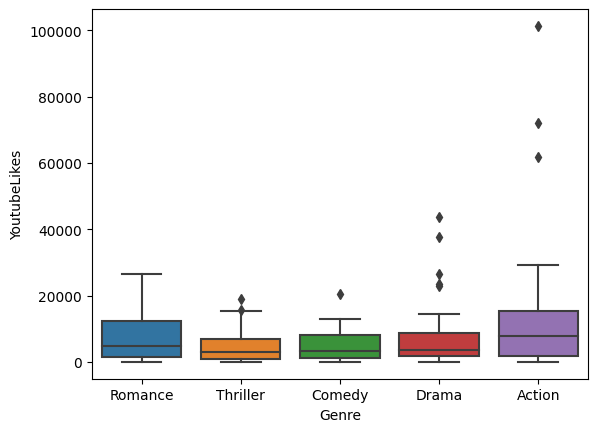

In [18]:
sn.boxplot(x = 'Genre', y = 'YoutubeLikes', data = data);

The action movie genre sees more youtubeLikes

#### 12. which of the variable among budget, boxofficecollection, youtube view, youtubelike, youtube dislikes are highly correlated. draw pair plot or heatmap

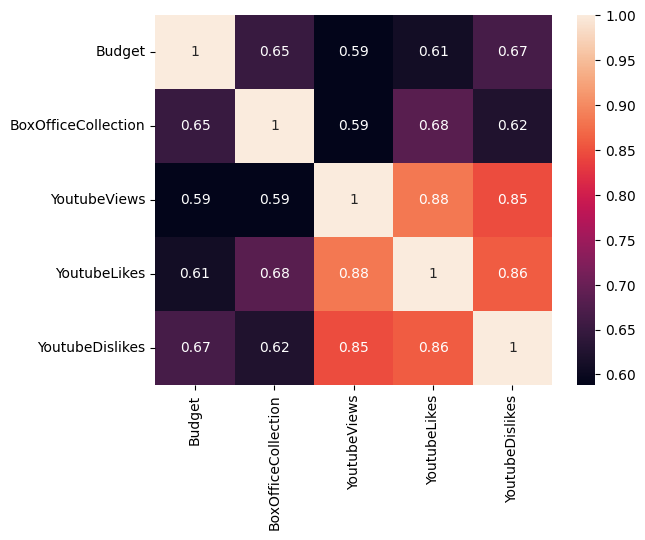

In [19]:
num = data[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']]
sn.heatmap(num.corr(), annot = True);

the YoutubeLikes and youtubeViews have a postive correlation of 0.88.
the YoutubeDislikes and YoutubeViews have a positive correlation of 0.85.
the YoutubeDislikes and YoutubeLikes have a positive correlation of 0.86.